In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/data/linearly_separable_dataset.csv')

In [52]:
data.head()

,x1,x2,label
0,2.498160,2.939169,1.0
1,4.802857,2.550266,1.0
2,3.927976,2.878998,1.0
3,3.394634,2.789655,1.0
4,1.624075,2.195800,1.0


In [53]:
def perceptron(X):
    w = np.zeros(X.shape[1])
    while True:
        m = 0
        for sample in data.iterrows():
            feature_vector = sample[1][:-1].values
            feature_vector = np.append(feature_vector, 1)  # Add bias term
            label = sample[1][-1]
            if label * (np.dot(w, feature_vector)) <= 0:
                w = w + label * feature_vector
                m += 1
        if m == 0:
            break
    return w

In [54]:
w_calculated = perceptron(data)

Weights: [-1.33057717 -6.590013  ]
Bias: 25.0


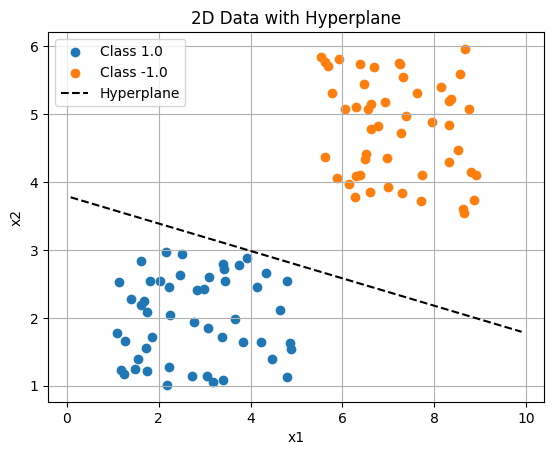

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is called df
# And it has columns: 'feature1', 'feature2', 'label'
feature1 = data.columns[0]  # First feature
feature2 = data.columns[1]  # Second feature

# Extract features and labels
X = data[[feature1, feature2]].values
y = data["label"].values

# Hyperplane parameters
w = w_calculated[:len(w_calculated) - 1]
b = w_calculated[-1]
print("Weights:", w)
print("Bias:", b)
# Range of x1 values for plotting the hyperplane
x1_vals = np.linspace(data[feature1].min() - 1, data[feature1].max() + 1, 100)
# Compute corresponding x2 values using the hyperplane equation
x2_vals = -(w[0]*x1_vals + b) / w[1]

# Plot the data points by label
for label in data['label'].unique():
    subset = data[data['label'] == label]
    plt.scatter(subset[feature1], subset[feature2], label=f"Class {label}")

# Plot the hyperplane
plt.plot(x1_vals, x2_vals, 'k--', label='Hyperplane')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("2D Data with Hyperplane")
plt.legend()
plt.grid(True)
plt.show()